<a href="https://colab.research.google.com/github/Infant-Joshva/Data-Science-learning-path/blob/main/DS-Practice-Notebooks/DS04-DL-NLP/NLP_Text_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text preprocessing

## Text cleaning

In [ ]:
review=['Mind Blowing phone go for it great performance camera is amazing you can look the shot with AI generation background was totally cleared from the crowd just go for it better than Iphone 15.',
        'I am not happy with battery performance ..I spend 70k for this phone and everything that a premium phone can perform it did on top but battery life just ruined everything..',
        "This phone is a perfect blend of performance and style. It's fast, reliable, and handles multitasking with ease. The camera delivers stunning photos, and the sleek design feels premium in the hand. Battery life easily lasts a full day, making it a great choice for everyday use ✌🏽✌🏽",
        """
        Camera- top class in sub 50k range...even better than iphone 15 in most aspects.3x telephoto is love and post processing is excellent

Performance-exynos is very powerful processor but issue is it overheats and is not efficient for gaming. So short bursts of high performance will not give any issues but where consistent performance is required like gaming it will overheat. But in day to day useage its extremely fast comparable to 8 gen 3.

Battery- 5 hr SOT with basic useage like camera, music, light gaming on WIFI. average in this department..Full day battery can be achieved only with light useage

Built quality-Its more premium than iphone 15 . Amber yellow colour is class apart.Its feels like 75k phone.

Software and display-you will have freedom here compared to IOS. One UI 7 looks very premium and is very fluent with 120hz...Display wise there is no competition...Its best of best..
https://notebooklm.google.com/
xyz@gmail.com
You can buy this phone if you are not gamer and willing to loose some Screen on time. In return in 45k you will get best display, software experience, speakers, built quality and good performance
        """]

In [ ]:
!pip install emoji #installing emojis packages

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 10.5 MB/s eta 0:00:00


In [ ]:
import re #importing regular expression
import emoji #importing emojis packages

#Function for lower case
def lowercase(text):
  return text.lower()

#remove url
def remove_urls(text):
  urls_pattern=re.compile(r'https?://\S+|www\.\S+')
  return urls_pattern.sub(r'',text)

# remove Mail
def remove_mail(text):
  mail_pattern=re.compile(r'\S+@\S+')
  return mail_pattern.sub(r'',text)

# remove HTML tags
def remove_html(text):
  html_pattern=re.compile('<.*?>')
  return html_pattern.sub(r'',text)

# remove punctuations
def remove_punctuations(text):
  punc_pattern=re.compile(r'[^\w\s]')
  return punc_pattern.sub(r'',text)

# remove numbers
def remove_numbers(text):
  text=re.sub(r'[A-Za-z]+\d+','',text)
  text=re.sub(r'\d+\s*[A-Za-z]+','',text)
  text=re.sub(r'\d+','',text)
  return text

# remove emoji
def remove_emoji(text):
  return emoji.replace_emoji(text,replace='')

# remove whitespace
def remove_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

In [ ]:
# combining all function as a single funcation
def text_cleaning(text):
  text=lowercase(text)
  text=remove_urls(text)
  text=remove_mail(text)
  text=remove_html(text)
  text=remove_punctuations(text)
  text=remove_numbers(text)
  text=remove_emoji(text)
  text=remove_whitespace(text)
  return text

In [ ]:
# getting cleaned text
cleaned_text = list(map(text_cleaning, review))
cleaned_text

['mind blowing phone go for it great performance camera is amazing you can look the shot with ai generation background was totally cleared from the crowd just go for it better than iphone',
 'i am not happy with battery performance i spend for this phone and everything that a premium phone can perform it did on top but battery life just ruined everything',
 'this phone is a perfect blend of performance and style its fast reliable and handles multitasking with ease the camera delivers stunning photos and the sleek design feels premium in the hand battery life easily lasts a full day making it a great choice for everyday use',
 'camera top class in sub rangeeven better than iphone most x telephoto is love and post processing is excellent performanceexynos is very powerful processor but issue is it overheats and is not efficient for gaming so short bursts of high performance will not give any issues but where consistent performance is required like gaming it will overheat but in day to da

# Tokenization

In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize # importing packages for word tekenization

def tokenize(text):
  return word_tokenize(text)


## Normalization

In [ ]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.0 MB/s eta 0:00:00


In [ ]:
import contractions # Finding the roor words

In [ ]:
def expand_contractions(text):
  return contractions.fix(text)

expand_contractions("don't")

'do not'

## Lemetization

In [ ]:
nltk.download('wordnet') # Download the WordNet corpus for lemmatization
nltk.download('omw-1.4') # Download the Open Multilingual WordNet corpus for lemmatization

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

## Stop words

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

stop_words=set(stopwords.words('english'))
lemmatizer=WordNetLemmatizer()

In [ ]:
stop_words

In [ ]:
lemmatizer

<WordNetLemmatizer>

### Lematizer and stop words functions

In [ ]:
# Lematize and stops words

def lemmatizer_stopwords(text):
  return [lemmatizer.lemmatize(word) for word in text if word not in stop_words]

In [ ]:
lemmatizer_stopwords(tokenize("i am driving a car"))

['driving', 'car']

# Vectorization(TF-IDF)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer # Doing TF-IDF
vectorizer=TfidfVectorizer()
vectorizer.fit_transform(cleaned_text)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 200 stored elements and shape (4, 153)>

**Steps to do before model buliding for text classification**
1. Text Cleaning
2. Tokenization
3. Expanding Contractions
4. Removing Stopwords
5. Lemmatization
6. Vectorization

# Sentiment Analysis

In [ ]:
!unzip '/content/IMDB.zip'

Archive:  /content/IMDB.zip
replace IMDB_cleaned.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: IMDB_cleaned.csv        


In [ ]:
import pandas as pd

In [ ]:
senti_df = pd.read_csv('/content/IMDB_cleaned.csv')
senti_df

,review,cleaned_review,sentiment
0,One of the other reviewers has mentioned that ...,one of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,a wonderful little production the filming tech...,positive
2,I thought this was a wonderful way to spend ti...,i thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,basically there is a family where a little boy...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei s love in the time of money is a...,positive
...,...,...,...
4995,An interesting slasher film with multiple susp...,an interesting slasher film with multiple susp...,negative
4996,i watched this series when it first came out i...,i watched this series when it first came out i...,positive
4997,Once again Jet Li brings his charismatic prese...,once again jet li brings his charismatic prese...,positive
4998,"I rented this movie, after hearing Chris Gore ...",i rented this movie after hearing chris gore s...,negative


In [ ]:
senti_df.drop('cleaned_review',axis=1,inplace=True)

In [ ]:
senti_df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
4995,An interesting slasher film with multiple susp...,negative
4996,i watched this series when it first came out i...,positive
4997,Once again Jet Li brings his charismatic prese...,positive
4998,"I rented this movie, after hearing Chris Gore ...",negative


In [ ]:
senti_df.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
senti_df.duplicated().sum()

np.int64(3)

In [ ]:
senti_df.drop_duplicates(inplace=True)

In [ ]:
senti_df.duplicated().sum()

np.int64(0)

In [ ]:
senti_df['sentiment'].value_counts()

,count
sentiment,
negative,2531
positive,2466


## Text cleaning

In [ ]:
senti_df['cleaned_review'] = senti_df['review'].apply(text_cleaning)

In [ ]:
senti_df

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...
...,...,...,...
4995,An interesting slasher film with multiple susp...,negative,an interesting slasher film with multiple susp...
4996,i watched this series when it first came out i...,positive,i watched this series when it first came out i...
4997,Once again Jet Li brings his charismatic prese...,positive,once again jet li brings his charismatic prese...
4998,"I rented this movie, after hearing Chris Gore ...",negative,i rented this movie after hearing chris gore s...


## Tokenization

In [ ]:
senti_df['tokenized_review'] = senti_df['cleaned_review'].apply(tokenize)
senti_df['tokenized_review']

,tokenized_review
0,"[one, of, the, other, reviewers, has, mentione..."
1,"[a, wonderful, little, production, the, filmin..."
2,"[i, thought, this, was, a, wonderful, way, to,..."
3,"[basically, theres, a, family, where, a, littl..."
4,"[petter, matteis, love, in, the, time, of, mon..."
...,...
4995,"[an, interesting, slasher, film, with, multipl..."
4996,"[i, watched, this, series, when, it, first, ca..."
4997,"[once, again, jet, li, brings, his, charismati..."
4998,"[i, rented, this, movie, after, hearing, chris..."


## Normalization(Lemmatizer and Stop words)

In [ ]:
# Lemetize
senti_df['Normalized_text']=senti_df['tokenized_review'].apply(lemmatizer_stopwords)
senti_df['Normalized_text']

,Normalized_text
0,"[one, reviewer, mentioned, watching, episode, ..."
1,"[wonderful, little, production, filming, techn..."
2,"[thought, wonderful, way, spend, time, hot, su..."
3,"[basically, there, family, little, boy, jake, ..."
4,"[petter, matteis, love, time, money, visually,..."
...,...
4995,"[interesting, slasher, film, multiple, suspect..."
4996,"[watched, series, first, came, old, watched, b..."
4997,"[jet, li, brings, charismatic, presence, movie..."
4998,"[rented, movie, hearing, chris, gore, saying, ..."


In [ ]:
# We can't vectorize the list of words, so wee need to convert the list into normal text and then do vector
senti_df['Final_text']=senti_df['Normalized_text'].apply(lambda x: ' '.join(x))
senti_df['Final_text']

,Final_text
0,one reviewer mentioned watching episode youll ...
1,wonderful little production filming technique ...
2,thought wonderful way spend time hot summer we...
3,basically there family little boy jake think t...
4,petter matteis love time money visually stunni...
...,...
4995,interesting slasher film multiple suspectsincl...
4996,watched series first came old watched best fri...
4997,jet li brings charismatic presence movie scree...
4998,rented movie hearing chris gore saying somethi...


In [ ]:
x=senti_df['Final_text']
y=senti_df['sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3997,), (1000,), (3997,), (1000,))

In [ ]:
#Pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [ ]:
nb_pipeline=Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('nb',MultinomialNB())
])

nb_pipeline

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

In [ ]:
nb_pipeline.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

In [ ]:
y_train_pred=nb_pipeline.predict(x_train)
y_test_pred=nb_pipeline.predict(x_test)

print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

    negative       0.93      0.99      0.96      2018
    positive       0.99      0.92      0.95      1979

    accuracy                           0.96      3997
   macro avg       0.96      0.96      0.96      3997
weighted avg       0.96      0.96      0.96      3997

              precision    recall  f1-score   support

    negative       0.78      0.92      0.85       513
    positive       0.90      0.73      0.81       487

    accuracy                           0.83      1000
   macro avg       0.84      0.83      0.83      1000
weighted avg       0.84      0.83      0.83      1000



> Model is overfit due to unwanted repetive words

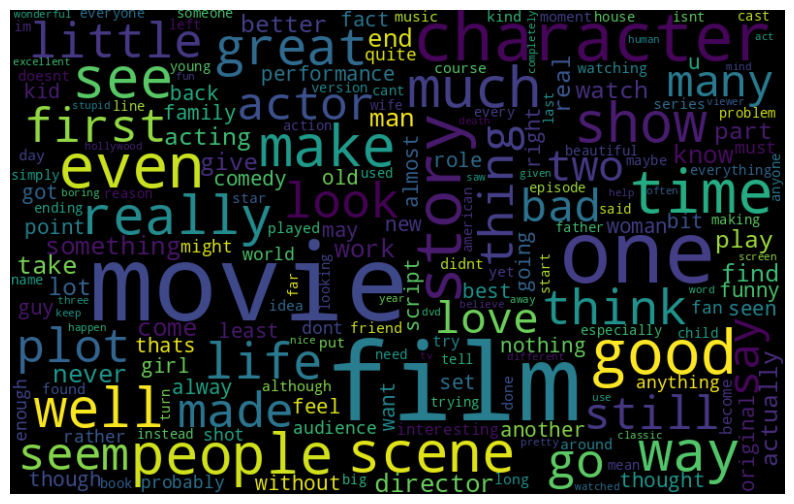

In [ ]:
# word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = ' '.join([text for text in senti_df['Final_text']])
wordcolud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcolud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
freq=pd.Series(' '.join(senti_df['Final_text']).split()).value_counts()
freq

,count
movie,9990
film,8825
one,5200
like,3944
good,2900
...,...
predictableviolence,1
drunksthe,1
nowherenbody,1
danglingthread,1


In [ ]:
freq_100 = freq[freq<=100]
freq_100

,count
us,100
impossible,100
agree,100
ben,100
visual,100
...,...
predictableviolence,1
drunksthe,1
nowherenbody,1
danglingthread,1


In [ ]:
senti_df['Final_text_new']=senti_df['Final_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in freq_100]))
senti_df['Final_text_new']

,Final_text_new
0,one mentioned watching episode youll right exa...
1,wonderful little production give sometimes sen...
2,thought wonderful way time hot air theater wat...
3,basically there family little boy think there ...
4,love time money film watch mr offer u human mo...
...,...
4995,interesting film typical girl change creepy on...
4996,watched series first came old watched best fri...
4997,brings movie screen film black film play soldi...
4998,movie gore saying something effect five star a...


In [ ]:
x=senti_df['Final_text_new']
y=senti_df['sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3997,), (1000,), (3997,), (1000,))

In [ ]:
#Pipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [ ]:
nb_pipeline=Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('nb',MultinomialNB())
])

nb_pipeline

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

In [ ]:
nb_pipeline.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

In [ ]:
y_train_pred=nb_pipeline.predict(x_train)
y_test_pred=nb_pipeline.predict(x_test)

print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

    negative       0.86      0.86      0.86      2018
    positive       0.86      0.86      0.86      1979

    accuracy                           0.86      3997
   macro avg       0.86      0.86      0.86      3997
weighted avg       0.86      0.86      0.86      3997

              precision    recall  f1-score   support

    negative       0.85      0.86      0.86       513
    positive       0.85      0.84      0.85       487

    accuracy                           0.85      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.85      0.85      0.85      1000



In [ ]:
nb_pipeline.predict(["""Coolie number 5821 - This is more of a Lokesh (Loki) movie which is driven by our super star Rajinikanth loaded with multiple star casts and Anirudh BGM is very enjoyable and elevated the movie to different level. When Vikram movie came, everyone went crazy because it was a excellent storyline, screenplay etc and it created a Loki universe (LCU) and was a trend setter.

To continue Loki legacy with actor like Rajnikanth, it is difficult to think something completely different story and it may not work as well. So, he sticked on to same (Vikram) kind of a cinematic experience to present to the audience (To attract rajini's wide fan base from various generations) which is really good to see. But there is no concrete storyline to support this movie and audience gets bit confused when this kind of a story moves so fast with not a big purpose (storyline). This movie is really a good one loaded with Rajnikanth swag and style on a big screen and it is a cinematic gift for 50 years completion and also to see Vintage Rajnikanth in falshback gives goosebumps. I like loki movies with the way he takes it in his style and so I like this movie as well and worth to watch in theatres. This movie has lots of attractive action sequence to enjoy. Actor Soubin Sahir acting was too good and eye catching and acted effortlessly, Ratchagan hero Nagarjuna is back in negative shade & did a decent job in acting with his style, look & charm, Sathyaraj comes only in flashback and he is too good as usual & Shrutihasan role was really good, cameos by Upendra & Amir khan is really good. Other actors Kanna Ravi, Rachita Ram, Charle did a good supporting role.

Overall, a cinematic gift to our beloved Superstar Rajnikanth at the age of 75 to cherish with overlaoded violence in Loki style and only he can manage these kind of stories with lot of stars studded with excellent screenplay but he needs to move on with different kind of storyline or subjects to continue his legacy forward."""])

array(['positive'], dtype='<U8')

# Spam detection

In [ ]:
!unzip '/content/Spam.zip'

Archive:  /content/Spam.zip
  inflating: spam-ham v2.csv         


In [ ]:
spam_df = pd.read_csv('/content/spam-ham v2.csv',encoding='latin-1')
# This dataset contains some diffrent character so we need to use encoding
spam_df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar then Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
spam_df.isnull().sum()

,0
v1,0
v2,0


In [ ]:
spam_df.duplicated().sum()

np.int64(401)

In [ ]:
spam_df.drop_duplicates(inplace=True)

## Text cleaning

In [ ]:
# Text cleaning
spam_df['cleaned_text']=spam_df['v2'].apply(text_cleaning)
spam_df

,v1,v2,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar then Joking wif u oni,ok lar then joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in wkly comp to win fa cup final tk...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,this is the time we have tried u u have won th...
5568,ham,Will Ì_ b going to esplanade fr home?,will ì_ b going to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity was in mood for that soany other suggestions
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like id ...


## Tokenization

In [ ]:
# Tokenization
spam_df['Tokenization']=spam_df['cleaned_text'].apply(tokenize)
spam_df

,v1,v2,cleaned_text,Tokenization
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,Ok lar then Joking wif u oni,ok lar then joking wif u oni,"[ok, lar, then, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in wkly comp to win fa cup final tk...,"[free, entry, in, wkly, comp, to, win, fa, cup..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l..."
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,this is the time we have tried u u have won th...,"[this, is, the, time, we, have, tried, u, u, h..."
5568,ham,Will Ì_ b going to esplanade fr home?,will ì_ b going to esplanade fr home,"[will, ì_, b, going, to, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...",pity was in mood for that soany other suggestions,"[pity, was, in, mood, for, that, soany, other,..."
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like id ...,"[the, guy, did, some, bitching, but, i, acted,..."


## Normalization(Lemmatizer and Stop words)

In [ ]:
# Normalization
spam_df['Normalized_text']=spam_df['Tokenization'].apply(lemmatizer_stopwords)
spam_df

,v1,v2,cleaned_text,Tokenization,Normalized_text
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,Ok lar then Joking wif u oni,ok lar then joking wif u oni,"[ok, lar, then, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in wkly comp to win fa cup final tk...,"[free, entry, in, wkly, comp, to, win, fa, cup...","[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, go, usf, life, around, though]"
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,this is the time we have tried u u have won th...,"[this, is, the, time, we, have, tried, u, u, h...","[time, tried, u, u, å, prize, easy, call, per,..."
5568,ham,Will Ì_ b going to esplanade fr home?,will ì_ b going to esplanade fr home,"[will, ì_, b, going, to, esplanade, fr, home]","[ì_, b, going, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other s...",pity was in mood for that soany other suggestions,"[pity, was, in, mood, for, that, soany, other,...","[pity, mood, soany, suggestion]"
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like id ...,"[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, id, interested, b..."


In [ ]:
spam_df['Final_text']=spam_df['Normalized_text'].apply(lambda x: ' '.join(x))
spam_df

,v1,v2,cleaned_text,Tokenization,Normalized_text,Final_text
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...",go jurong point crazy available bugis n great ...
1,ham,Ok lar then Joking wif u oni,ok lar then joking wif u oni,"[ok, lar, then, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]",ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in wkly comp to win fa cup final tk...,"[free, entry, in, wkly, comp, to, win, fa, cup...","[free, entry, wkly, comp, win, fa, cup, final,...",free entry wkly comp win fa cup final tkts may...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, u, c, already, t...","[u, dun, say, early, hor, u, c, already, say]",u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...,"[nah, i, dont, think, he, goes, to, usf, he, l...","[nah, dont, think, go, usf, life, around, though]",nah dont think go usf life around though
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,this is the time we have tried u u have won th...,"[this, is, the, time, we, have, tried, u, u, h...","[time, tried, u, u, å, prize, easy, call, per,...",time tried u u å prize easy call per minute bt...
5568,ham,Will Ì_ b going to esplanade fr home?,will ì_ b going to esplanade fr home,"[will, ì_, b, going, to, esplanade, fr, home]","[ì_, b, going, esplanade, fr, home]",ì_ b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity was in mood for that soany other suggestions,"[pity, was, in, mood, for, that, soany, other,...","[pity, mood, soany, suggestion]",pity mood soany suggestion
5570,ham,The guy did some bitching but I acted like i'd...,the guy did some bitching but i acted like id ...,"[the, guy, did, some, bitching, but, i, acted,...","[guy, bitching, acted, like, id, interested, b...",guy bitching acted like id interested buying s...


In [ ]:
spam_df['v1'].value_counts()

,count
v1,
ham,4518
spam,653


In [ ]:
x=spam_df['Final_text']
y=spam_df['v1']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4136,), (1035,), (4136,), (1035,))

In [ ]:
nb_pipeline=Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('nb',MultinomialNB(class_prior=[0.1,0.9]))
])

nb_pipeline.fit(x_train,y_train)

y_train_pred=nb_pipeline.predict(x_train)
y_test_pred=nb_pipeline.predict(x_test)

print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         ham       1.00      0.47      0.64      3626
        spam       0.21      0.99      0.35       510

    accuracy                           0.54      4136
   macro avg       0.60      0.73      0.49      4136
weighted avg       0.90      0.54      0.60      4136

              precision    recall  f1-score   support

         ham       1.00      0.51      0.67       892
        spam       0.25      1.00      0.39       143

    accuracy                           0.57      1035
   macro avg       0.62      0.75      0.53      1035
weighted avg       0.90      0.57      0.63      1035



In [ ]:
nb_pipeline=Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('nb',MultinomialNB(class_prior=[0.3,0.7]))
])

nb_pipeline.fit(x_train,y_train)

y_train_pred=nb_pipeline.predict(x_train)
y_test_pred=nb_pipeline.predict(x_test)

print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         ham       1.00      0.83      0.91      3626
        spam       0.45      0.99      0.62       510

    accuracy                           0.85      4136
   macro avg       0.73      0.91      0.76      4136
weighted avg       0.93      0.85      0.87      4136

              precision    recall  f1-score   support

         ham       0.99      0.84      0.91       892
        spam       0.48      0.94      0.64       143

    accuracy                           0.85      1035
   macro avg       0.74      0.89      0.77      1035
weighted avg       0.92      0.85      0.87      1035



In [ ]:
nb_pipeline=Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('nb',MultinomialNB(class_prior=[0.4,0.6]))
])

nb_pipeline.fit(x_train,y_train)

y_train_pred=nb_pipeline.predict(x_train)
y_test_pred=nb_pipeline.predict(x_test)

print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

         ham       1.00      0.91      0.95      3626
        spam       0.61      0.98      0.75       510

    accuracy                           0.92      4136
   macro avg       0.80      0.95      0.85      4136
weighted avg       0.95      0.92      0.93      4136

              precision    recall  f1-score   support

         ham       0.99      0.91      0.95       892
        spam       0.63      0.92      0.75       143

    accuracy                           0.91      1035
   macro avg       0.81      0.92      0.85      1035
weighted avg       0.94      0.91      0.92      1035



# Topic Modeling

## Text cleaning

In [ ]:
!unzip '/content/Topic_modeling.zip'

Archive:  /content/Topic_modeling.zip
  inflating: topic_classifier.csv    


In [ ]:
topic_df=pd.read_csv('/content/topic_classifier.csv')
topic_df

,title,c1body,Topic
0,How Does Your AD Password Policy Compare to NI...,End-user passwords are one of the weakest comp...,News
1,Hackers Using Fake Trump's Scandal Video to Sp...,Cybesecurity researchers today revealed a new ...,News
2,Russian Hacker Gets 12-Years Prison for Massiv...,A U.S. court on Thursday sentenced a 37-year-o...,News
3,Google Speech-to-Text API Can Help Attackers E...,A three-year-old attack technique to bypass Go...,News
4,Secret Backdoor Account Found in Several Zyxel...,Zyxel has released a patch to address a critic...,News
...,...,...,...
5866,"LPT: It’s not that you “don’t like reading,” b...",I’ve met a lot of people who have said that th...,Entertainment
5867,"LPT: If you want to sound smart, don't make up...",A lot of people think they have to know everyt...,Entertainment
5868,LPT: Don’t talk bad about your kids to other p...,Growing up I’d always overhear my mom complain...,Entertainment
5869,LPT: Don't take criticism from someone you wou...,[link] [comments],Entertainment


In [ ]:
# Joining the both column
topic_df['join_text']=topic_df['title']+' '+topic_df['c1body']
topic_df

,title,c1body,Topic,join_text
0,How Does Your AD Password Policy Compare to NI...,End-user passwords are one of the weakest comp...,News,How Does Your AD Password Policy Compare to NI...
1,Hackers Using Fake Trump's Scandal Video to Sp...,Cybesecurity researchers today revealed a new ...,News,Hackers Using Fake Trump's Scandal Video to Sp...
2,Russian Hacker Gets 12-Years Prison for Massiv...,A U.S. court on Thursday sentenced a 37-year-o...,News,Russian Hacker Gets 12-Years Prison for Massiv...
3,Google Speech-to-Text API Can Help Attackers E...,A three-year-old attack technique to bypass Go...,News,Google Speech-to-Text API Can Help Attackers E...
4,Secret Backdoor Account Found in Several Zyxel...,Zyxel has released a patch to address a critic...,News,Secret Backdoor Account Found in Several Zyxel...
...,...,...,...,...
5866,"LPT: It’s not that you “don’t like reading,” b...",I’ve met a lot of people who have said that th...,Entertainment,"LPT: It’s not that you “don’t like reading,” b..."
5867,"LPT: If you want to sound smart, don't make up...",A lot of people think they have to know everyt...,Entertainment,"LPT: If you want to sound smart, don't make up..."
5868,LPT: Don’t talk bad about your kids to other p...,Growing up I’d always overhear my mom complain...,Entertainment,LPT: Don’t talk bad about your kids to other p...
5869,LPT: Don't take criticism from someone you wou...,[link] [comments],Entertainment,LPT: Don't take criticism from someone you wou...


In [ ]:
# Droping the unused column
topic_df.drop(['title','c1body'],axis=1,inplace=True)
topic_df

,Topic,join_text
0,News,How Does Your AD Password Policy Compare to NI...
1,News,Hackers Using Fake Trump's Scandal Video to Sp...
2,News,Russian Hacker Gets 12-Years Prison for Massiv...
3,News,Google Speech-to-Text API Can Help Attackers E...
4,News,Secret Backdoor Account Found in Several Zyxel...
...,...,...
5866,Entertainment,"LPT: It’s not that you “don’t like reading,” b..."
5867,Entertainment,"LPT: If you want to sound smart, don't make up..."
5868,Entertainment,LPT: Don’t talk bad about your kids to other p...
5869,Entertainment,LPT: Don't take criticism from someone you wou...


In [ ]:
topic_df.isnull().sum()

,0
Topic,0
join_text,94


In [ ]:
topic_df.dropna(inplace=True)

In [ ]:
topic_df.duplicated().sum()

np.int64(21)

In [ ]:
topic_df.drop_duplicates(inplace=True)

In [ ]:
topic_df['Cleaned_text']=topic_df['join_text'].apply(text_cleaning)
topic_df

,Topic,join_text,Cleaned_text
0,News,How Does Your AD Password Policy Compare to NI...,how does your ad password policy compare to ni...
1,News,Hackers Using Fake Trump's Scandal Video to Sp...,hackers using fake trumps scandal video to spr...
2,News,Russian Hacker Gets 12-Years Prison for Massiv...,russian hacker gets prison for massive jp morg...
3,News,Google Speech-to-Text API Can Help Attackers E...,google speechtotext api can help attackers eas...
4,News,Secret Backdoor Account Found in Several Zyxel...,secret backdoor account found in several zyxel...
...,...,...,...
5866,Entertainment,"LPT: It’s not that you “don’t like reading,” b...",lpt its not that you dont like reading but rat...
5867,Entertainment,"LPT: If you want to sound smart, don't make up...",lpt if you want to sound smart dont make up fa...
5868,Entertainment,LPT: Don’t talk bad about your kids to other p...,lpt dont talk bad about your kids to other peo...
5869,Entertainment,LPT: Don't take criticism from someone you wou...,lpt dont take criticism from someone you would...


## Tokenization

In [ ]:
topic_df['tokenize_text']=topic_df['Cleaned_text'].apply(tokenize)
topic_df

,Topic,join_text,Cleaned_text,tokenize_text
0,News,How Does Your AD Password Policy Compare to NI...,how does your ad password policy compare to ni...,"[how, does, your, ad, password, policy, compar..."
1,News,Hackers Using Fake Trump's Scandal Video to Sp...,hackers using fake trumps scandal video to spr...,"[hackers, using, fake, trumps, scandal, video,..."
2,News,Russian Hacker Gets 12-Years Prison for Massiv...,russian hacker gets prison for massive jp morg...,"[russian, hacker, gets, prison, for, massive, ..."
3,News,Google Speech-to-Text API Can Help Attackers E...,google speechtotext api can help attackers eas...,"[google, speechtotext, api, can, help, attacke..."
4,News,Secret Backdoor Account Found in Several Zyxel...,secret backdoor account found in several zyxel...,"[secret, backdoor, account, found, in, several..."
...,...,...,...,...
5866,Entertainment,"LPT: It’s not that you “don’t like reading,” b...",lpt its not that you dont like reading but rat...,"[lpt, its, not, that, you, dont, like, reading..."
5867,Entertainment,"LPT: If you want to sound smart, don't make up...",lpt if you want to sound smart dont make up fa...,"[lpt, if, you, want, to, sound, smart, dont, m..."
5868,Entertainment,LPT: Don’t talk bad about your kids to other p...,lpt dont talk bad about your kids to other peo...,"[lpt, dont, talk, bad, about, your, kids, to, ..."
5869,Entertainment,LPT: Don't take criticism from someone you wou...,lpt dont take criticism from someone you would...,"[lpt, dont, take, criticism, from, someone, yo..."


## Normalization(Lemmatizer and Stop words)

In [ ]:
topic_df['Normalized_text']=topic_df['tokenize_text'].apply(lemmatizer_stopwords)
topic_df

,Topic,join_text,Cleaned_text,tokenize_text,Normalized_text
0,News,How Does Your AD Password Policy Compare to NI...,how does your ad password policy compare to ni...,"[how, does, your, ad, password, policy, compar...","[ad, password, policy, compare, nist, password..."
1,News,Hackers Using Fake Trump's Scandal Video to Sp...,hackers using fake trumps scandal video to spr...,"[hackers, using, fake, trumps, scandal, video,...","[hacker, using, fake, trump, scandal, video, s..."
2,News,Russian Hacker Gets 12-Years Prison for Massiv...,russian hacker gets prison for massive jp morg...,"[russian, hacker, gets, prison, for, massive, ...","[russian, hacker, get, prison, massive, jp, mo..."
3,News,Google Speech-to-Text API Can Help Attackers E...,google speechtotext api can help attackers eas...,"[google, speechtotext, api, can, help, attacke...","[google, speechtotext, api, help, attacker, ea..."
4,News,Secret Backdoor Account Found in Several Zyxel...,secret backdoor account found in several zyxel...,"[secret, backdoor, account, found, in, several...","[secret, backdoor, account, found, several, zy..."
...,...,...,...,...,...
5866,Entertainment,"LPT: It’s not that you “don’t like reading,” b...",lpt its not that you dont like reading but rat...,"[lpt, its, not, that, you, dont, like, reading...","[lpt, dont, like, reading, rather, havent, fou..."
5867,Entertainment,"LPT: If you want to sound smart, don't make up...",lpt if you want to sound smart dont make up fa...,"[lpt, if, you, want, to, sound, smart, dont, m...","[lpt, want, sound, smart, dont, make, fact, sa..."
5868,Entertainment,LPT: Don’t talk bad about your kids to other p...,lpt dont talk bad about your kids to other peo...,"[lpt, dont, talk, bad, about, your, kids, to, ...","[lpt, dont, talk, bad, kid, people, growing, i..."
5869,Entertainment,LPT: Don't take criticism from someone you wou...,lpt dont take criticism from someone you would...,"[lpt, dont, take, criticism, from, someone, yo...","[lpt, dont, take, criticism, someone, wouldnt,..."


In [ ]:
topic_df['Final_text']=topic_df['Normalized_text'].apply(lambda x: ' '.join(x))
topic_df

,Topic,join_text,Cleaned_text,tokenize_text,Normalized_text,Final_text
0,News,How Does Your AD Password Policy Compare to NI...,how does your ad password policy compare to ni...,"[how, does, your, ad, password, policy, compar...","[ad, password, policy, compare, nist, password...",ad password policy compare nist password recom...
1,News,Hackers Using Fake Trump's Scandal Video to Sp...,hackers using fake trumps scandal video to spr...,"[hackers, using, fake, trumps, scandal, video,...","[hacker, using, fake, trump, scandal, video, s...",hacker using fake trump scandal video spread q...
2,News,Russian Hacker Gets 12-Years Prison for Massiv...,russian hacker gets prison for massive jp morg...,"[russian, hacker, gets, prison, for, massive, ...","[russian, hacker, get, prison, massive, jp, mo...",russian hacker get prison massive jp morgan ch...
3,News,Google Speech-to-Text API Can Help Attackers E...,google speechtotext api can help attackers eas...,"[google, speechtotext, api, can, help, attacke...","[google, speechtotext, api, help, attacker, ea...",google speechtotext api help attacker easily b...
4,News,Secret Backdoor Account Found in Several Zyxel...,secret backdoor account found in several zyxel...,"[secret, backdoor, account, found, in, several...","[secret, backdoor, account, found, several, zy...",secret backdoor account found several zyxel fi...
...,...,...,...,...,...,...
5866,Entertainment,"LPT: It’s not that you “don’t like reading,” b...",lpt its not that you dont like reading but rat...,"[lpt, its, not, that, you, dont, like, reading...","[lpt, dont, like, reading, rather, havent, fou...",lpt dont like reading rather havent found some...
5867,Entertainment,"LPT: If you want to sound smart, don't make up...",lpt if you want to sound smart dont make up fa...,"[lpt, if, you, want, to, sound, smart, dont, m...","[lpt, want, sound, smart, dont, make, fact, sa...",lpt want sound smart dont make fact say im ign...
5868,Entertainment,LPT: Don’t talk bad about your kids to other p...,lpt dont talk bad about your kids to other peo...,"[lpt, dont, talk, bad, about, your, kids, to, ...","[lpt, dont, talk, bad, kid, people, growing, i...",lpt dont talk bad kid people growing id always...
5869,Entertainment,LPT: Don't take criticism from someone you wou...,lpt dont take criticism from someone you would...,"[lpt, dont, take, criticism, from, someone, yo...","[lpt, dont, take, criticism, someone, wouldnt,...",lpt dont take criticism someone wouldnt take a...


In [ ]:
x=topic_df['Final_text']
y=topic_df['Topic']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4604,), (1152,), (4604,), (1152,))

In [ ]:
nb_pipeline=Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('nb',MultinomialNB())
])

nb_pipeline.fit(x_train,y_train)

y_train_pred=nb_pipeline.predict(x_train)
y_test_pred=nb_pipeline.predict(x_test)

print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

                      precision    recall  f1-score   support

       Entertainment       0.60      1.00      0.75      1597
        Independence       1.00      0.29      0.45       303
    Machine Learning       0.93      0.84      0.88       517
                News       0.96      0.69      0.80       825
             Science       1.00      0.04      0.07       260
Software Development       0.99      0.82      0.90       472
         Sprituality       0.95      0.68      0.79       544
            Wellness       1.00      0.08      0.15        86

            accuracy                           0.75      4604
           macro avg       0.93      0.55      0.60      4604
        weighted avg       0.84      0.75      0.73      4604

                      precision    recall  f1-score   support

       Entertainment       0.54      1.00      0.70       408
        Independence       1.00      0.16      0.28        74
    Machine Learning       0.91      0.69      0.78       145
    

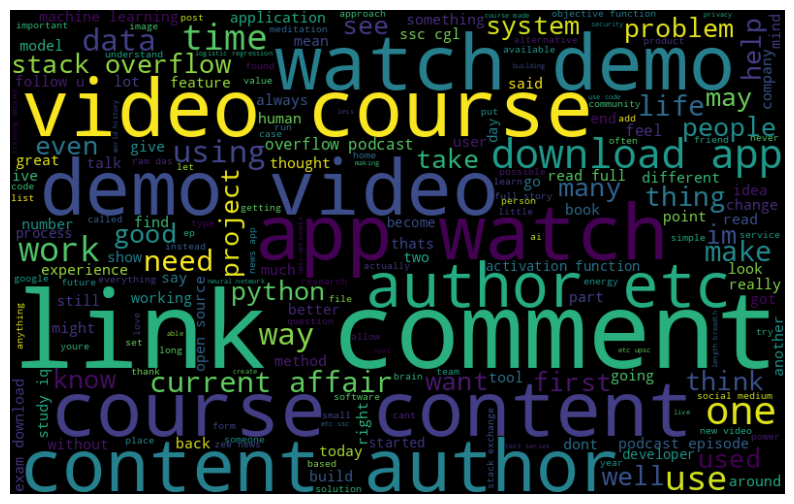

In [ ]:
# word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_words = ' '.join([text for text in topic_df['Final_text']])
wordcolud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcolud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
freq=pd.Series(' '.join(topic_df['Final_text']).split()).value_counts()
freq

,count
link,3249
comment,2958
video,2643
course,2282
get,1810
...,...
firearm,1
aquire,1
boater,1
callous,1


In [ ]:
freq_100=freq[freq<200]
freq_100

,count
ever,199
group,199
everyone,199
hindu,198
able,198
...,...
firearm,1
aquire,1
boater,1
callous,1


In [ ]:
topic_df['Final_text_new']=topic_df['Final_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in freq_100]))
topic_df

,Topic,join_text,Cleaned_text,tokenize_text,Normalized_text,Final_text,Final_text_new
0,News,How Does Your AD Password Policy Compare to NI...,how does your ad password policy compare to ni...,"[how, does, your, ad, password, policy, compar...","[ad, password, policy, compare, nist, password...",ad password policy compare nist password recom...,one user work personal may also company user m...
1,News,Hackers Using Fake Trump's Scandal Video to Sp...,hackers using fake trumps scandal video to spr...,"[hackers, using, fake, trumps, scandal, video,...","[hacker, using, fake, trump, scandal, video, s...",hacker using fake trump scandal video spread q...,using video today new access video u line good...
2,News,Russian Hacker Gets 12-Years Prison for Massiv...,russian hacker gets prison for massive jp morg...,"[russian, hacker, gets, prison, for, massive, ...","[russian, hacker, get, prison, massive, jp, mo...",russian hacker get prison massive jp morgan ch...,get u personal information news company comput...
3,News,Google Speech-to-Text API Can Help Attackers E...,google speechtotext api can help attackers eas...,"[google, speechtotext, api, can, help, attacke...","[google, speechtotext, api, help, attacker, ea...",google speechtotext api help attacker easily b...,google help google google using found still wo...
4,News,Secret Backdoor Account Found in Several Zyxel...,secret backdoor account found in several zyxel...,"[secret, backdoor, account, found, in, several...","[secret, backdoor, account, found, several, zy...",secret backdoor account found several zyxel fi...,found product could version including
...,...,...,...,...,...,...,...
5866,Entertainment,"LPT: It’s not that you “don’t like reading,” b...",lpt its not that you dont like reading but rat...,"[lpt, its, not, that, you, dont, like, reading...","[lpt, dont, like, reading, rather, havent, fou...",lpt dont like reading rather havent found some...,dont like found something ive lot people said ...
5867,Entertainment,"LPT: If you want to sound smart, don't make up...",lpt if you want to sound smart dont make up fa...,"[lpt, if, you, want, to, sound, smart, dont, m...","[lpt, want, sound, smart, dont, make, fact, sa...",lpt want sound smart dont make fact say im ign...,want dont make say im lot people think know ev...
5868,Entertainment,LPT: Don’t talk bad about your kids to other p...,lpt dont talk bad about your kids to other peo...,"[lpt, dont, talk, bad, about, your, kids, to, ...","[lpt, dont, talk, bad, kid, people, growing, i...",lpt dont talk bad kid people growing id always...,dont talk people always create never one day d...
5869,Entertainment,LPT: Don't take criticism from someone you wou...,lpt dont take criticism from someone you would...,"[lpt, dont, take, criticism, from, someone, yo...","[lpt, dont, take, criticism, someone, wouldnt,...",lpt dont take criticism someone wouldnt take a...,dont take someone take link comment


In [ ]:
x=topic_df['Final_text_new']
y=topic_df['Topic']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4604,), (1152,), (4604,), (1152,))

In [ ]:
nb_pipeline=Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('nb',MultinomialNB())
])

nb_pipeline.fit(x_train,y_train)

y_train_pred=nb_pipeline.predict(x_train)
y_test_pred=nb_pipeline.predict(x_test)

print(classification_report(y_train,y_train_pred))
print(classification_report(y_test,y_test_pred))

                      precision    recall  f1-score   support

       Entertainment       0.62      0.94      0.74      1597
        Independence       0.78      0.56      0.65       303
    Machine Learning       0.76      0.76      0.76       517
                News       0.70      0.41      0.52       825
             Science       0.90      0.22      0.35       260
Software Development       0.93      0.81      0.86       472
         Sprituality       0.83      0.67      0.74       544
            Wellness       1.00      0.47      0.63        86

            accuracy                           0.70      4604
           macro avg       0.82      0.60      0.66      4604
        weighted avg       0.74      0.70      0.69      4604

                      precision    recall  f1-score   support

       Entertainment       0.61      0.93      0.74       408
        Independence       0.71      0.43      0.54        74
    Machine Learning       0.81      0.69      0.75       145
    